<a href="https://colab.research.google.com/github/LucasColas/ML01-Machine-Learning-for-everyone/blob/main/ML01_TD7_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 : TD7 - Régression Logistique - Partie 1

Réalisé par Cyprien Gilet et Khaled Belahcene

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import scipy.stats as stats

from IPython.display import Image


# 1. Prise en main de la Descente de Gradient

On considère la fonction convexe $f : \mathbb{R}^2 \to \mathbb{R}$  définie de la façon suivante :
\begin{equation}
f(x_1,x_2) = 3\left(x_1 + 4\right)^2 + 2\left(x_2 + 7\right)^2 + \frac{6}{7}.
\end{equation}
La figure ci-dessous illustre cette fonction $f$.

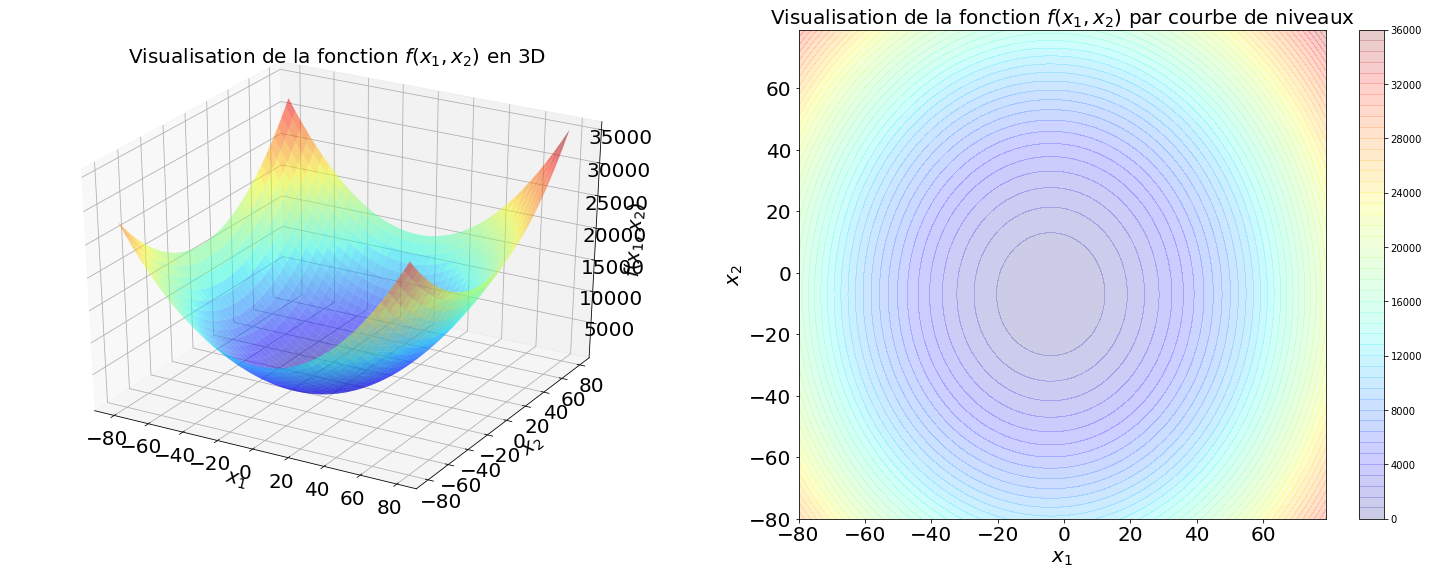

In [13]:
# objective function
def objective(x1, x2):
	return 3*((x1+4)**2) + ((x2+7)**2)*2 + 6/7

# Plot figure :
figGrad = plt.figure(figsize=(26,9))

# define range for input
r_min, r_max = -80.0, 80.0
x1axis = np.arange(r_min, r_max, 1)
x2axis = np.arange(r_min, r_max, 1)
xx1, xx2 = np.meshgrid(x1axis, x2axis)
# compute targets
f_xx1_xx2 = objective(xx1, xx2)

ax1 = figGrad.add_subplot(1,2,1, projection='3d')
ax1.plot_surface(xx1, xx2, f_xx1_xx2, cmap='jet', alpha=0.5)
ax1.set_xlabel("$x_1$",fontsize=20)
ax1.set_ylabel("$x_2$",fontsize=20)
ax1.set_zlabel("$f(x_1,x_2)$",fontsize=20)
ax1.set_title("Visualisation de la fonction $f(x_1,x_2)$ en 3D",fontsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='z', labelsize=20)

ax2 = figGrad.add_subplot(1,2,2)
out_f = ax2.contourf(xx1, xx2, f_xx1_xx2, alpha=0.2, levels=50, cmap='jet')
ax2.set_xlabel("$x_1$",fontsize=20)
ax2.set_ylabel("$x_2$",fontsize=20)
ax2.set_title("Visualisation de la fonction $f(x_1,x_2)$ par courbe de niveaux",fontsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
figGrad.colorbar(out_f)



**Question 1.1.** Calculer analytiquement le gradient de $f$ et déterminer le point $\bar{x} = [\bar{x}_1,\bar{x}_2]$ pour lequel $f$ est minimisée.


\begin{equation}
\nabla f(x_1,x_2) \;=\; 
\begin{bmatrix}
\frac{\partial f(x_1,x_2)}{\partial x_1}  \\
\frac{\partial f(x_1,x_2)}{\partial x_2}
\end{bmatrix}
\;=\; 
\begin{bmatrix}
6 x_1 + 24  \\
4 x_2 + 28
\end{bmatrix}.
\end{equation}

\begin{equation}
\nabla f(x_1,x_2) \;=\; 
\begin{bmatrix}
0  \\
0
\end{bmatrix}
\quad \Rightarrow \quad
\left\{\begin{matrix}
6 x_1 + 24 = 0 \\
4 x_2 + 28 = 0
\end{matrix}\right.
\quad \Rightarrow \quad
\left\{\begin{matrix}
x_1 = -4 \\
x_2 = -7
\end{matrix}\right.
\end{equation}

On en déduit que $\bar{x} = [-4,-7]$ minimise $f$.

**Question 1.2.** Implémenter l'algorithme de Descente de Gradient dans le code ci-dessous pour retrouver le point $\bar{x} = [\bar{x}_1,\bar{x}_2]$ pour lequel $f$ est minimisée. 
On initialisera $x^{(0)} = \left[x_1^{(0)}, x_2^{(0)}\right] = [-60,60]$.
On pourra par exemple considérer $M=20$ itérations et $\gamma = 0.1$ comme pas du gradient.
Pour chaque itération $m\in\{1,\dots,M\}$ de cet algorithme, on stockera les valeurs de $x^{(m)} = \left[x_1^{(m)}, x_2^{(m)}\right]$ et de $f\left(x_1^{(m)}, x_2^{(m)}\right)$. 

x_bar = [-4.00000181 -6.99591729]


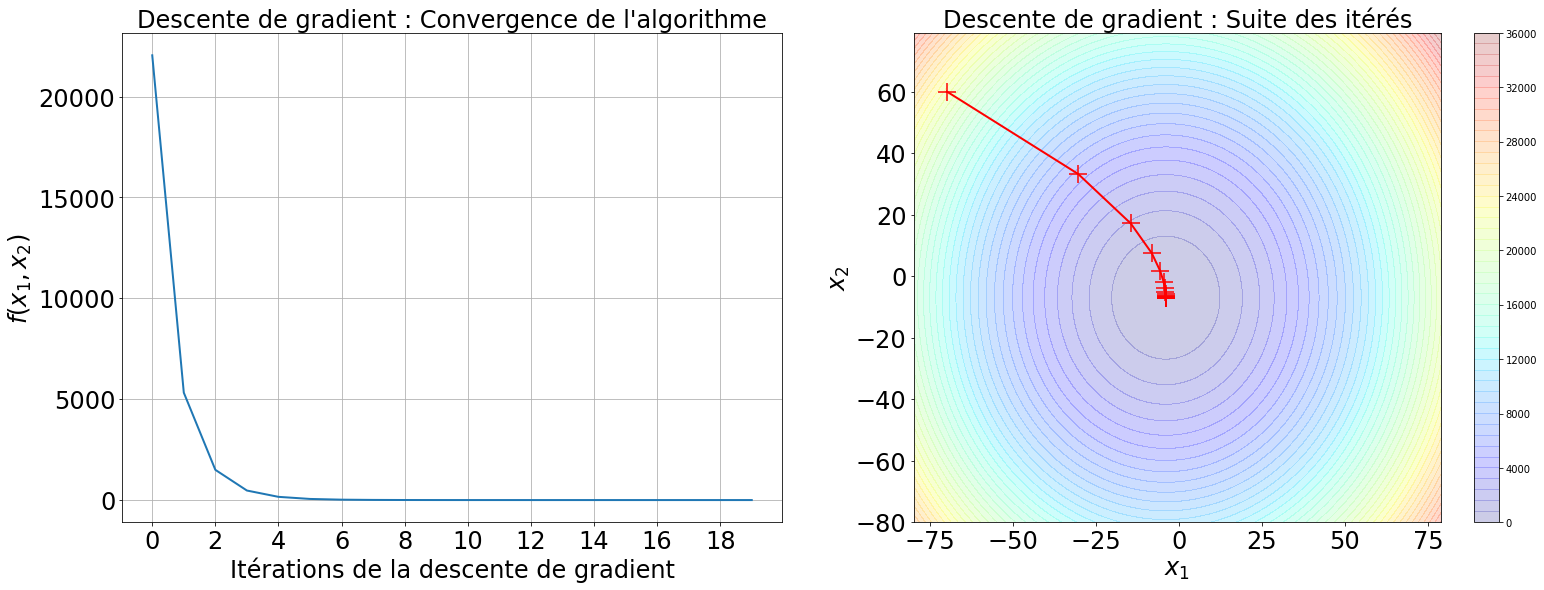

In [14]:
# RÉPONSE À LA QUESTION 1.2 :

M = 20
gamma = 0.1
grad = np.zeros(2)
x = np.zeros(2) 
x[0] = -70
x[1] = 60

# stock x 
stock_x = np.zeros((M,2))
stock_x[0,0] = x[0]
stock_x[0,1] = x[1]

# stock f 
stock_f = np.zeros(M)
stock_f[0] = objective(x[0],x[1])

for m in range(1,M):
    # Calcul du gradient :
    # À COMPLÉTER...
    grad[0] = 6*x[0] + 24
    grad[1] = 4*x[1] + 28

    
    # Itération du gradient et mise à jour de x :
    # À COMPLÉTER...
    x[0] = x[0] - gamma*grad[0]
    x[1] = x[1] - gamma*grad[1]

    
    # stock x à l'itération m :
    stock_x[m,0] = x[0]
    stock_x[m,1] = x[1]
    # stock f l'itération m :
    stock_f[m] = objective(x[0],x[1])
    
print('x_bar =', x)


# Plot figure :
figGrad = plt.figure(figsize=(26,9))

ax1 = figGrad.add_subplot(1,2,1)
ax1.plot(np.arange(0, M, 1),stock_f,lw=2)
ax1.set_xlabel("Itérations de la descente de gradient",fontsize=24)
ax1.set_ylabel("$f(x_1,x_2)$",fontsize=24)
ax1.set_title("Descente de gradient : Convergence de l'algorithme",fontsize=24)
ax1.set_xticks(np.arange(0, M, 2))
ax1.tick_params(axis='x', labelsize=24)
ax1.tick_params(axis='y', labelsize=24)
ax1.grid()

ax2 = figGrad.add_subplot(1,2,2)
out_f = ax2.contourf(xx1, xx2, f_xx1_xx2, alpha=0.2, levels=50, cmap='jet')
ax2.plot(stock_x[:,0],stock_x[:,1],ls='-',lw=2, color='red')
ax2.scatter(stock_x[:,0].tolist(), stock_x[:,1].tolist(), color='red', marker='+',s=350)
ax2.set_xlabel("$x_1$",fontsize=24)
ax2.set_ylabel("$x_2$",fontsize=24)
ax2.set_title("Descente de gradient : Suite des itérés",fontsize=24)
ax2.tick_params(axis='x', labelsize=24)
ax2.tick_params(axis='y', labelsize=24)
figGrad.colorbar(out_f)



# 2. Descente de Gradient pour la Régression Logistique

- Pour chaque observation $i \in \{1,\dots,n\}$, on rappelle que $Y_i$ caractérise la variable aléatoire décrivant la classe de l'observation $i$.
- De plus, pour chaque observation $i \in \{1,\dots,n\}$, $X_i = [X_{i1},\dots,X_{id}]$ caractérise le vecteur aléatoire décrivant le profile de l'observation $i$, composés de $d$ variables descriptives.

La Régression Logistique binaire ($K=2$ classes : $Y_i\in\{0,1\}$) est un classifieur discriminatif.
La règle de décision de la Régression Logistique peut se définir comme :

\begin{equation}
\hat{Y}_i = 
\begin{cases}
1 & \text{si } \sigma\left(\beta_0 + \sum_{j=1}^d \beta_j X_{ij}\right) \geq 0.5 \\
0 & \text{sinon.} 
\end{cases}
\end{equation}
 
- Où $\beta = [\beta_0,\dots,\beta_d]\in\mathbb{R}^{d+1}$ correspond à un vecteur de poids générateur de l'hyperplan séparant la classe $0$ de la clase $1$
- Et où quelque soit $z\in\mathbb{R}, \;  \sigma(z) = \frac{1}{1 \, + \,\mathrm{exp}(-z)}$.
- Rappelons que la fonction $\sigma\left(\beta_0 + \sum_{j=1}^d \beta_j X_{ij}\right)$ cherche à modéliser $\mathbb{P}(Y_i = 1 \mid X_i)$.

Comme illustré dans la figure ci-dessous, l'architecture de la Régression Logistique peut se voir comme un réseau de 1 seul neurone avec comme couche de sortie la fonction logistique (aussi appelée sigmoïde) $\sigma$.

![title](Schema_LR_new_3.pdf)


L'objectif de cet exercice est de construire un algorithme permettant de calibrer la Régression Logistique sur une base d'apprentissage. Nous avons vu dans le cours que pour calibrer les paramètres $\beta\in\mathbb{R}^{d+1}$ de la Régression Logistique, cela est équivalent à calculer les paramètres $\bar{\beta}\in\mathbb{R}^{d+1}$ minimisant
$$
\mathcal{L}(\beta) =  \sum_{i=1}^n \,  \log \left[ 1+ \mathrm{e}^{\left(\beta_0 + \sum_{j=1}^d \beta_j x_{ij} \right)} \right] - y_i \left(\beta_0 + \sum_{j=1}^d \beta_j x_{ij} \right).
$$

Pour ce faire, nous pouvons utiliser l'algorithme de descente de gradient où

\begin{equation}
\nabla\mathcal{L}\left( \beta\right) = 
\begin{bmatrix}
\frac{\partial \mathcal{L}(\beta)}{\partial \beta_0} \\
\vdots\\
\frac{\partial \mathcal{L}(\beta)}{\partial \beta_j} \\
\vdots \\
\frac{\partial \mathcal{L}(\beta)}{\partial \beta_d}
\end{bmatrix}
\quad \text{ où } \quad 
\begin{cases}
\frac{\partial \mathcal{L}(\beta)}{\partial \beta_0} =  \sum_{i=1}^n \sigma\left(\beta_0 + \sum_{j=1}^d \beta_j x_{ij}\right) - y_i\\
\\
\text{et où } \; \forall j\in\{1,\dots,d\},\\
\\
\frac{\partial \mathcal{L}(\beta)}{\partial \beta_j} =  \sum_{i=1}^n \left[\sigma\left(\beta_0 + \sum_{j=1}^d \beta_j x_{ij}\right) - y_i \right] x_{ij}.
\end{cases}
\end{equation}

**Question 2.1.** Implémenter la fonction logistique $\sigma : \mathbb{R} \to (0,1)$ prenant en entrée une valeur quelconque $z\in\mathbb{R}$. 

In [22]:
# RÉPONSE À LA QUESTION 2.1 :

def sigmoid_logistic(z):
    return 1/(1 + np.exp(-z))

**Question 2.2.** Implémenter une fonction permettant de prédire la classe $\hat{Y}_i\in\{0,1\}$ ainsi que le score de probabilité à postériori estimé à partir d'un vecteur de poids $\beta\in\mathbb{R}^{d+1}$ donné.

In [23]:
# RÉPONSE À LA QUESTION 2.2 :

def predict_LR(XTrain, beta):
    
    n = XTrain.shape[0]
    d = XTrain.shape[1] 
    Yhat = np.zeros(n)
    ProbHat = np.zeros(n)
    
    # À COMPLÉTER...
    for i in range(n):
      Ai = np.concatenate([np.ones(1), XTrain[i,:]])
      Zi = np.dot(beta,Ai)
      sigma_i = sigmoid_logistic(Zi)
      ProbHat[i] = sigma_i
      if sigma_i >= 0.5:
        Yhat[i] = 1
            
    return Yhat, ProbHat


**Question 2.3.** Implémenter une fonction permettant de calculer $\mathcal{L}(\beta)$ pour un vecteur $\beta\in\mathbb{R}^{d+1}$ donné.

In [17]:
# RÉPONSE À LA QUESTION 2.3 :

def function_objective(XTrain, YRTrain, beta):

    L_beta = 0
    
    for i in range(XTrain.shape[0]):
      Ai = np.concatenate([np.ones(1), XTrain[i,:]])
      Zi = np.dot(beta,Ai)
      L_beta += np.log(1+ np.exp(Zi)) + YRTrain[i] * Zi
            
    return L_beta


**Question 2.4.** Implémenter une fonction prenant en entrée base d'apprentissage (XTrain, YRTrain) ainsi que des paramètres $\beta = [\beta_0,\dots,\beta_d]\in\mathbb{R}^{d+1}$ et calculant $\nabla\mathcal{L}\left( \beta\right)$. 

In [18]:
# RÉPONSE À LA QUESTION 2.4 :

def compute_grad_LR(XTrain, YRTrain, beta):
    

    n = XTrain.shape[0]
    d = XTrain.shape[1] 
    
    grad = np.zeros(d+1)
    
    #beta_0 :
    for i in range(n):
        Ai = np.concatenate([np.ones(1), XTrain[i,:]])
        Zi = np.dot(beta,Ai)
        grad[0] = grad[0] + (sigmoid_logistic(Zi)-YRTrain[i])
            
    #beta_j, j = 1,...,d :
    for j in range(1,d+1):
        for i in range(n):
            Ai = np.concatenate([np.ones(1), XTrain[i,:]])
            Zi = np.dot(beta,Ai)
            grad[j] = grad[j] + (sigmoid_logistic(Zi)-YRTrain[i])*XTrain[i,j-1]
            
    return grad


**Question 2.5.** Implémenter une fonction permettant de calibrer la Regréssion logistique sur une base d'apprentissage (XTrain, YRTrain) à partir d'un algorithme de descente de gradient. Pour chaque itération de cet algorithme, nous stockerons les valeurs de l'accuracy de la Régression Logistique ainsi que les valeurs de $\mathcal{L}(\beta)$.

In [24]:
# RÉPONSE À LA QUESTION 2.5 :

def calibration_LR(XTrain, YRTrain, M, gamma):
    
    n = XTrain.shape[0]
    d = XTrain.shape[1] 
    
    stock_L_beta = np.zeros(M)
    stock_accuracy = np.zeros(M)
    beta = np.zeros(d+1)
    
    # À COMPLÉTER...

    for m in range(M):
      grad_LR = compute_grad_LR(XTrain, YRTrain, beta)
      beta = beta - gamma*grad_LR
        
      Yhat, ProbHat = predict_LR(XTrain, beta)
      stock_accuracy[m] = np.sum(Yhat==YRTrain)/n
      stock_L_beta[m] = function_objective(XTrain, YRTrain, beta)
            
    return beta, stock_L_beta, stock_accuracy


**Question 2.6.** Calibrer la Régression Logistique sur la base de données simulée ci-dessous et afficher la convergence de l'algorithme de descente de gradient. On pourra par exemple considérer $M = 300$ itérations
avec comme pas du gradient $\gamma = 0.003$.

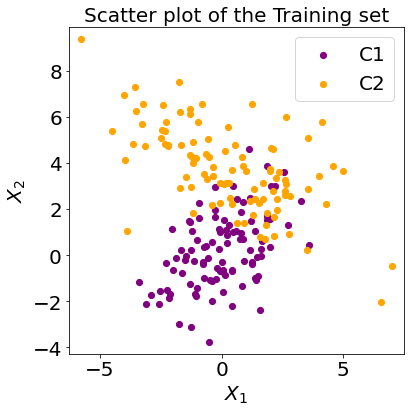

In [20]:
np.random.seed(407)

n1 = 100 
n2 = 100
n = n1+n2
mu1 = [0, 0]
mu2 = [0, 4]
Cov1 = np.array([[2, 1], [1, 3]])
Cov2 = np.array([[6, -3], [-3, 3.5]])
rng = np.random.default_rng(0)
XTrain = np.r_[rng.multivariate_normal(mu1, Cov1, size=n1), rng.multivariate_normal(mu2, Cov2, size=n2)]
YRTrain = np.r_[np.zeros((n1,1)), np.ones((n2,1))].ravel()

X1_min, X1_max = XTrain[:, 0].min() - 0.5, XTrain[:, 0].max() + 0.5
X2_min, X2_max = XTrain[:, 1].min() - 0.5, XTrain[:, 1].max() + 0.5

figScatter = plt.figure(figsize=(6,6))
ax1 = figScatter.add_subplot(1,1,1)
ax1.scatter(XTrain[np.where(YRTrain==0),0], XTrain[np.where(YRTrain==0),1], color='purple', marker='.', label='C1',s=150)
ax1.scatter(XTrain[np.where(YRTrain==1),0], XTrain[np.where(YRTrain==1),1], color='orange', marker='.', label='C2',s=150)
ax1.legend(fontsize=20, loc='upper right')
ax1.set_xlabel("$X_1$",fontsize=20)
ax1.set_ylabel("$X_2$",fontsize=20)
ax1.set_title("Scatter plot of the Training set",fontsize=20)
ax1.set_xlim([X1_min,X1_max])
ax1.set_ylim([X2_min,X2_max])
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)

beta_LR = [-2.57110235  0.36734659  1.22583538]


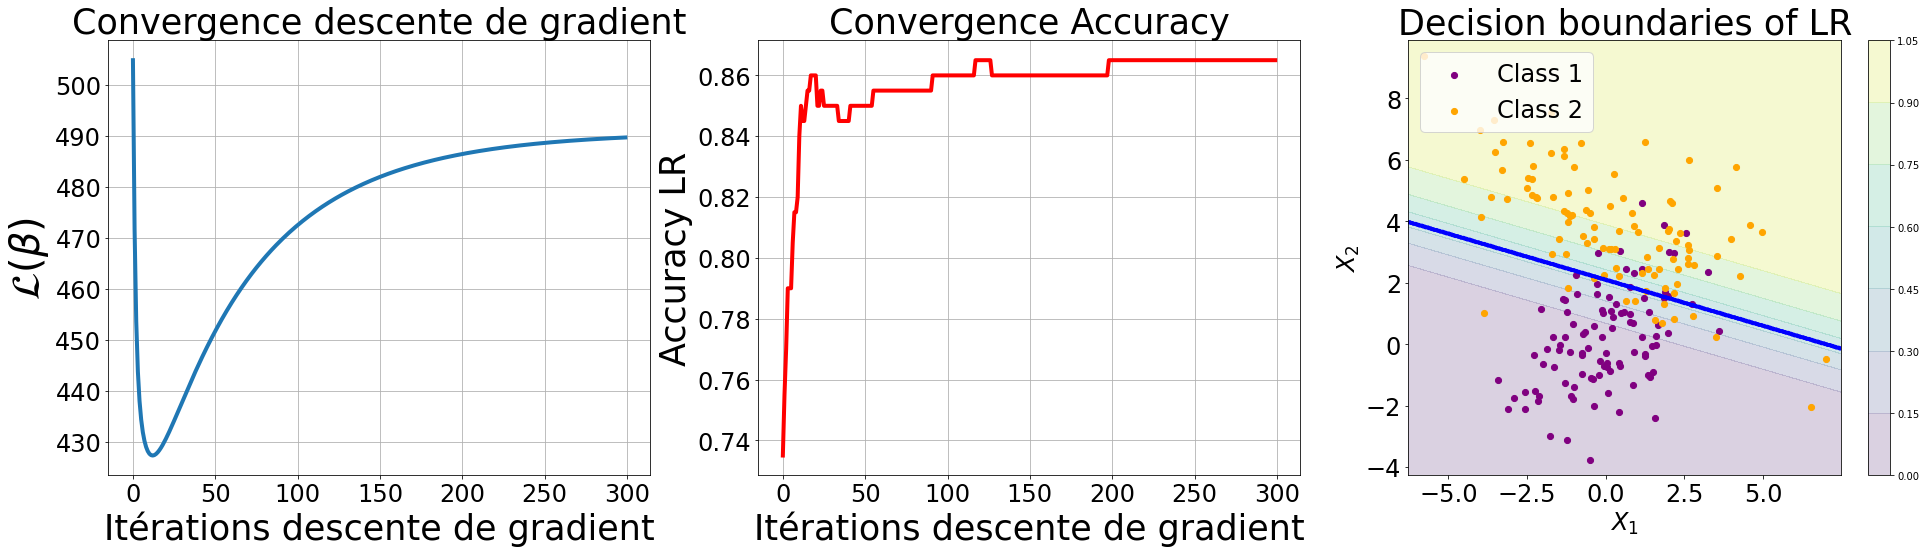

In [25]:
# RÉPONSE À LA QUESTION 2.6 :
M = 300
gamma = 0.003
beta, stock_L_beta, stock_accuracy = calibration_LR(XTrain, YRTrain, M, gamma)
print('beta_LR =', beta)

# Plot figure :
figConvLR = plt.figure(figsize=(33,8))

ax1 = figConvLR.add_subplot(1,3,1)
ax1.plot(np.arange(0, M, 1), stock_L_beta, lw=4)
ax1.set_xlabel("Itérations descente de gradient",fontsize=35)
ax1.set_ylabel(r"$\mathcal{L}(\beta)$",fontsize=40)
ax1.set_title("Convergence descente de gradient",fontsize=35)
ax1.tick_params(axis='x', labelsize=24)
ax1.tick_params(axis='y', labelsize=24)
ax1.grid()

ax2 = figConvLR.add_subplot(1,3,2)
ax2.plot(np.arange(0, M, 1), stock_accuracy, lw=4, color='red')
ax2.set_xlabel("Itérations descente de gradient",fontsize=35)
ax2.set_ylabel("Accuracy LR",fontsize=35)
ax2.set_title("Convergence Accuracy", fontsize=35)
ax2.tick_params(axis='x', labelsize=24)
ax2.tick_params(axis='y', labelsize=24)
ax2.grid()

ax3 = figConvLR.add_subplot(1,3,3)
nn = 500
xx1, xx2 = np.meshgrid(np.linspace(X1_min, X1_max, nn), np.linspace(X2_min, X2_max, nn))
Yhat, ProbHat = predict_LR(np.c_[xx1.ravel(), xx2.ravel()], beta)
out_prob = ax3.contourf(xx1, xx2, ProbHat.reshape(xx1.shape), alpha=0.2)
out = ax3.contour(xx1, xx2, Yhat.reshape(xx1.shape), [0.5], linewidths=4.0, colors="blue")
ax3.scatter(XTrain[(np.where(YRTrain==0)),0].tolist(), XTrain[(np.where(YRTrain==0)),1].tolist(), color='purple', marker='.', label='Class 1',s=150)
ax3.scatter(XTrain[(np.where(YRTrain==1)),0].tolist(), XTrain[(np.where(YRTrain==1)),1].tolist(), color='orange', marker='.', label='Class 2',s=150)
ax3.legend(fontsize=24, loc='upper left')
ax3.set_xlabel("$X_1$",fontsize=24)
ax3.set_ylabel("$X_2$",fontsize=24)
ax3.set_title("Decision boundaries of LR",fontsize=35)
ax3.tick_params(axis='x', labelsize=24)
ax3.tick_params(axis='y', labelsize=24)
figConvLR.colorbar(out_prob)
